In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
file_path = '../data/processed_data/hotel_data_kwh.xlsx'

excel_file = pd.ExcelFile(file_path)
print(f"📋 Available sheets: {excel_file.sheet_names}\n")

sheet_names = ['Otel1', 'Otel2', 'Otel3', 'Otel4']

all_hotels = []

for sheet_name in sheet_names:
    print(f"Loading {sheet_name}...")
    df_temp = pd.read_excel(file_path, sheet_name=sheet_name)
    df_temp['hotel_id'] = sheet_name
    
    columns_to_drop = [col for col in df_temp.columns if 
                       col.startswith('Unnamed:') or 
                       col == 'TOPLAM DOĞALGAZ KWH.1']
    
    if columns_to_drop:
        print(f"  🗑️  Dropping columns: {columns_to_drop}")
        df_temp = df_temp.drop(columns=columns_to_drop)
    
    all_hotels.append(df_temp)
    print(f"  ✅ {sheet_name}: {df_temp.shape[0]} rows, {df_temp.shape[1]} columns")
    print(f"     Columns: {df_temp.columns.tolist()}\n")

df = pd.concat(all_hotels, ignore_index=True)

print(f"{'='*60}")
print(f"✅ ALL HOTELS LOADED FROM PROCESSED DATA!")
print(f"{'='*60}")
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")
print(f"Hotels: {df['hotel_id'].unique()}")
print(f"\nAll columns in combined dataset:")
print(df.columns.tolist())

df.head(10)

📋 Available sheets: ['Otel1', 'Otel2', 'Otel3', 'Otel4']

Loading Otel1...
  ✅ Otel1: 835 rows, 14 columns
     Columns: ['TARİH', 'TOPLAM ELEKTRİK KWH', 'TOPLAM SU m³', 'TOPLAM DOĞALGAZ KWH', 'feelslikeavg', 'Dolu Oda', 'Toplam Kişi', 'Dolu %', 'Arrival Pax', 'Departure Pax', 'feelslikemax', 'tempmax', 'tempavg', 'hotel_id']

Loading Otel2...
  ✅ Otel2: 689 rows, 14 columns
     Columns: ['TARİH', 'TOPLAM ELEKTRİK KWH', 'TOPLAM SU m³', 'Dolu Oda', 'Toplam Kişi', 'Dolu %', 'Arrival Pax', 'Departure Pax', 'feelslikeavg', 'tempavg', 'tempmax', 'feelslikemax', 'TOPLAM DOĞALGAZ KWH', 'hotel_id']

Loading Otel3...
  🗑️  Dropping columns: ['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']
  ✅ Otel3: 882 rows, 13 columns
     Columns: ['TARİH', 'TOPLAM ELEKTRİK KWH', 'TOPLAM SU m³', 'Dolu Oda', 'Toplam Kişi', 'Arrival Pax', 'Departure Pax', 'feelslikeavg', 'feelslikemax', 'tempavg', 'tempmax', 'TOPLAM DOĞALGAZ KWH', 'hotel_id']

Loading Otel4...
  🗑️  Dropping columns: ['TOPLAM DOĞALGAZ KWH.1']
  ✅ O

,TARİH,TOPLAM ELEKTRİK KWH,TOPLAM SU m³,TOPLAM DOĞALGAZ KWH,feelslikeavg,Dolu Oda,Toplam Kişi,Dolu %,Arrival Pax,Departure Pax,feelslikemax,tempmax,tempavg,hotel_id
0,2022-01-01,9407.76,1026.0,171121.47280,13.3,679.0,1887,68.24,53.0,47.5,18.9,18.9,13.5,Otel1
1,2022-01-02,7905.36,727.0,31958.91677,15.6,74.0,228,7.44,138.5,1605.5,20.2,20.2,15.6,Otel1
2,2022-01-03,6817.20,1325.0,89880.07567,12.0,112.0,316,11.26,100.5,24.0,17.2,17.2,12.4,Otel1
3,2022-01-04,7058.52,601.0,81060.76879,12.5,144.0,412,14.47,107.5,24.5,18.9,18.9,12.8,Otel1
4,2022-01-05,7826.28,825.0,84802.07725,12.1,156.0,450,15.68,76.5,50.5,16.1,16.1,12.4,Otel1
5,2022-01-06,6944.04,565.0,85595.67647,13.8,336.0,792,33.77,381.5,51.0,16.8,16.8,13.8,Otel1
6,2022-01-07,6603.72,516.0,97012.91147,14.3,668.0,1472,67.14,676.0,38.0,18.1,18.1,14.3,Otel1
7,2022-01-08,9315.36,745.0,102179.02590,12.1,691.0,1488,69.45,100.5,75.0,13.1,13.1,12.1,Otel1
8,2022-01-09,7850.16,556.0,102566.78940,10.8,509.0,1085,51.16,25.0,389.5,15.8,15.8,11.3,Otel1
9,2022-01-10,8538.72,625.0,96335.15917,9.8,101.0,273,10.15,18.5,792.5,12.9,12.9,10.4,Otel1


In [3]:
print("="*60)
print("DATA QUALITY ASSESSMENT")
print("="*60)

print("\n1. MISSING VALUES:")
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

print("\n2. DATA TYPES:")
print(df.dtypes)

print("\n3. DATE RANGE:")
if 'TARİH' in df.columns:
    print(f"From: {df['TARİH'].min()}")
    print(f"To: {df['TARİH'].max()}")
    print(f"Total days: {df['TARİH'].nunique()}")
elif 'date' in df.columns:
    print(f"From: {df['date'].min()}")
    print(f"To: {df['date'].max()}")
    print(f"Total days: {df['date'].nunique()}")

print("\n4. BASIC STATISTICS:")
print(df.describe())

DATA QUALITY ASSESSMENT

1. MISSING VALUES:
                     Missing Count  Missing %
TOPLAM SU m³                     1       0.03
TOPLAM DOĞALGAZ KWH            324       9.99
Dolu Oda                       836      25.79
Dolu %                        1718      52.99
Arrival Pax                    836      25.79
Departure Pax                  836      25.79
feelslikemax                   471      14.53
tempmax                        471      14.53
tempavg                        471      14.53

2. DATA TYPES:
TARİH                  datetime64[ns]
TOPLAM ELEKTRİK KWH           float64
TOPLAM SU m³                  float64
TOPLAM DOĞALGAZ KWH           float64
feelslikeavg                  float64
Dolu Oda                      float64
Toplam Kişi                     int64
Dolu %                        float64
Arrival Pax                   float64
Departure Pax                 float64
feelslikemax                  float64
tempmax                       float64
tempavg                 

In [4]:
clean_df = df.copy()

column_mapping = {
    'TARİH': 'date',
    'TOPLAM ELEKTRİK KWH': 'electricity_kwh',
    'TOPLAM SU m³': 'water_m3',
    'TOPLAM DOĞALGAZ KWH': 'natural_gas_kwh',
    'Dolu Oda': 'occupied_rooms',
    'Toplam Kişi': 'total_guests',
    'Dolu %': 'occupancy_pct',
    'Arrival Pax': 'arrivals',
    'Departure Pax': 'departures',
    'tempavg': 'temp_avg',
    'tempmax': 'temp_max',
    'feelslikeavg': 'feels_like_avg',
    'feelslikemax': 'feels_like_max'
}

existing_columns = {k: v for k, v in column_mapping.items() if k in clean_df.columns}
clean_df.rename(columns=existing_columns, inplace=True)

print("="*60)
print("STANDARDIZED DATASET CREATED")
print("="*60)
print(f"Shape: {clean_df.shape}")
print(f"\nColumns: {clean_df.columns.tolist()}")
print(f"\nFirst few rows:")
clean_df.head()

STANDARDIZED DATASET CREATED
Shape: (3242, 14)

Columns: ['date', 'electricity_kwh', 'water_m3', 'natural_gas_kwh', 'feels_like_avg', 'occupied_rooms', 'total_guests', 'occupancy_pct', 'arrivals', 'departures', 'feels_like_max', 'temp_max', 'temp_avg', 'hotel_id']

First few rows:


,date,electricity_kwh,water_m3,natural_gas_kwh,feels_like_avg,occupied_rooms,total_guests,occupancy_pct,arrivals,departures,feels_like_max,temp_max,temp_avg,hotel_id
0,2022-01-01,9407.76,1026.0,171121.47280,13.3,679.0,1887,68.24,53.0,47.5,18.9,18.9,13.5,Otel1
1,2022-01-02,7905.36,727.0,31958.91677,15.6,74.0,228,7.44,138.5,1605.5,20.2,20.2,15.6,Otel1
2,2022-01-03,6817.20,1325.0,89880.07567,12.0,112.0,316,11.26,100.5,24.0,17.2,17.2,12.4,Otel1
3,2022-01-04,7058.52,601.0,81060.76879,12.5,144.0,412,14.47,107.5,24.5,18.9,18.9,12.8,Otel1
4,2022-01-05,7826.28,825.0,84802.07725,12.1,156.0,450,15.68,76.5,50.5,16.1,16.1,12.4,Otel1


In [5]:
print("="*60)
print("📊 SUMMARY STATISTICS BY HOTEL")
print("="*60)

energy_cols = [col for col in clean_df.columns if 'kwh' in col.lower() or 'water' in col.lower() or 'm3' in col.lower()]
if energy_cols:
    print("\n⚡ ENERGY CONSUMPTION SUMMARY:")
    energy_summary = clean_df.groupby('hotel_id')[energy_cols].agg(['mean', 'std', 'min', 'max']).round(2)
    print(energy_summary)

occupancy_cols = [col for col in clean_df.columns if any(x in col.lower() for x in ['occupied', 'occupancy', 'guest'])]
if occupancy_cols:
    print("\n🏨 OCCUPANCY SUMMARY:")
    occupancy_summary = clean_df.groupby('hotel_id')[occupancy_cols].agg(['mean', 'std', 'min', 'max']).round(2)
    print(occupancy_summary)

weather_cols = [col for col in clean_df.columns if 'temp' in col.lower() or 'feels' in col.lower()]
if weather_cols:
    print("\n🌡️ WEATHER SUMMARY:")
    weather_summary = clean_df.groupby('hotel_id')[weather_cols].agg(['mean', 'std', 'min', 'max']).round(2)
    print(weather_summary)

📊 SUMMARY STATISTICS BY HOTEL

⚡ ENERGY CONSUMPTION SUMMARY:
         electricity_kwh                               water_m3          \
                    mean       std       min       max     mean     std   
hotel_id                                                                  
Otel1           26930.52  16228.54   3676.50  84247.92  1443.00  524.43   
Otel2           16621.38   4718.00   5704.02  32954.04    87.61  164.11   
Otel3           21515.77   5815.95  11336.85  39249.00   450.95  142.69   
Otel4           34145.37  15263.16   9903.60  94361.40  1174.59  978.29   

                         natural_gas_kwh                                
            min      max            mean       std      min        max  
hotel_id                                                                
Otel1     249.0   2736.0        75145.02  27291.81      0.0  208939.81  
Otel2       0.0   2000.0        11673.21   1810.40   8904.2   16014.90  
Otel3      50.0    913.0         8643.12   2275.

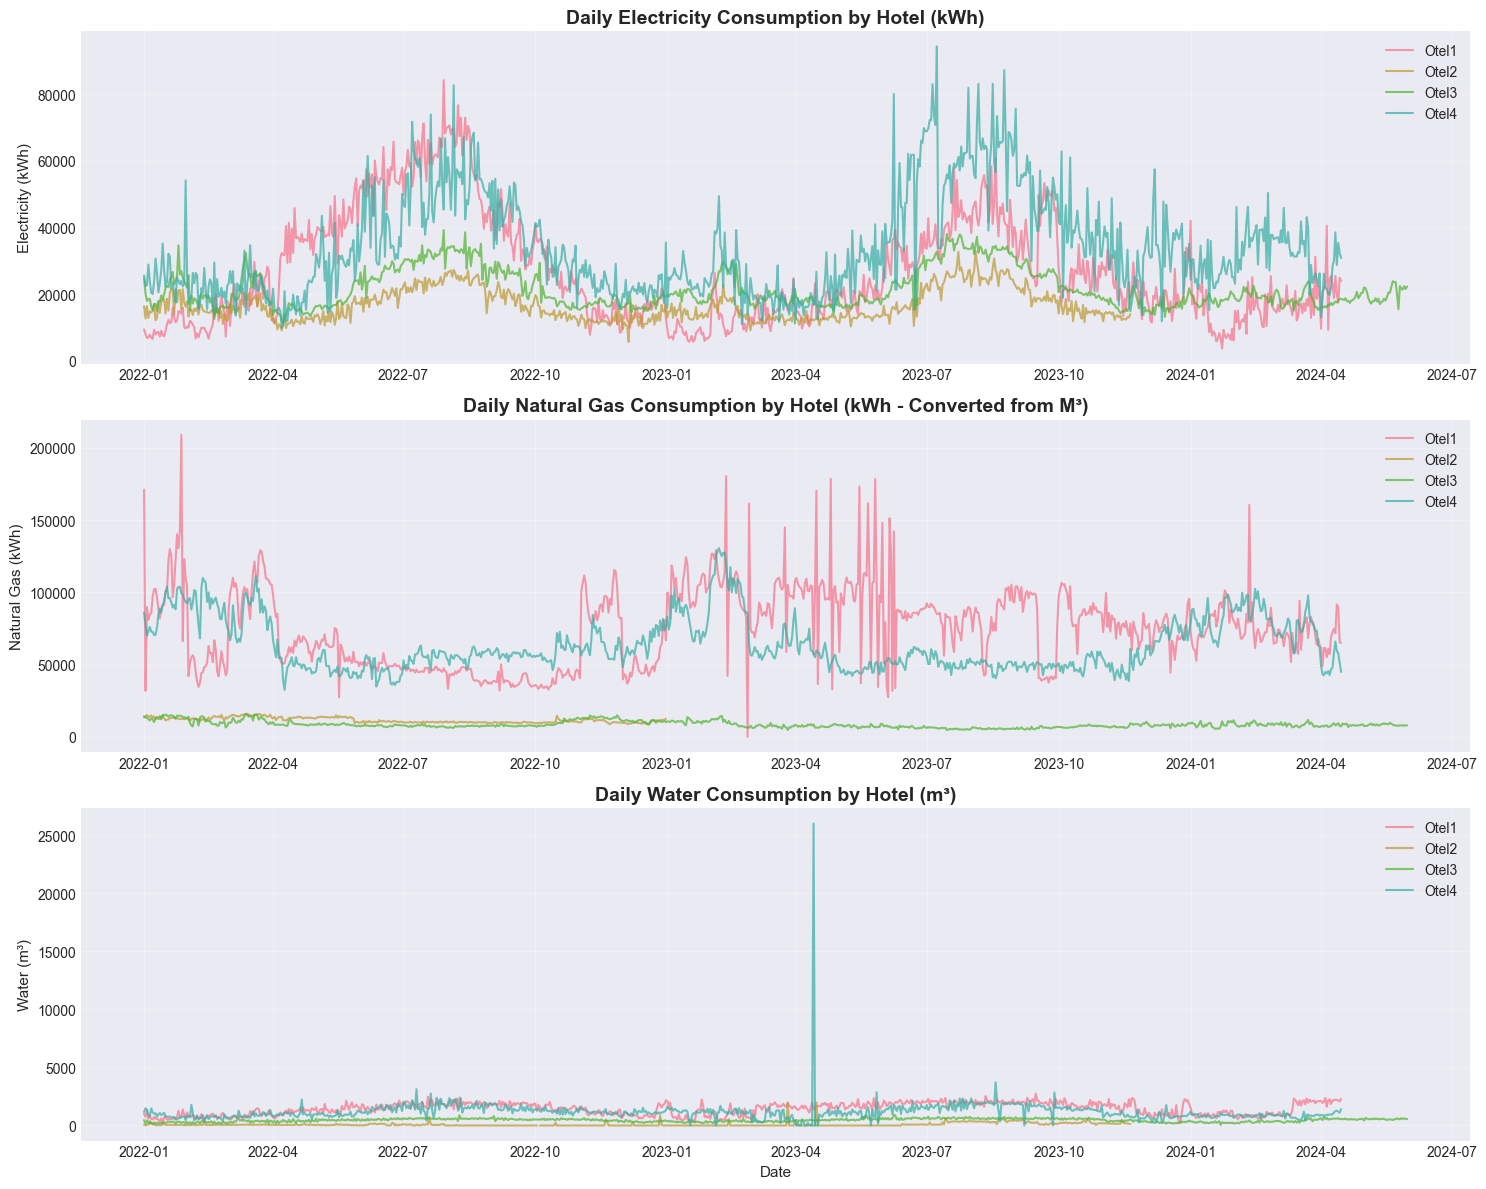

✅ Figure saved: ../results/figures_results/01_energy_consumption_timeseries.png


In [6]:
date_col = 'date' if 'date' in clean_df.columns else 'TARİH'
elec_col = 'electricity_kwh' if 'electricity_kwh' in clean_df.columns else 'TOPLAM ELEKTRİK KWH'
gas_col = 'natural_gas_kwh' if 'natural_gas_kwh' in clean_df.columns else 'TOPLAM DOĞALGAZ KWH'
water_col = 'water_m3' if 'water_m3' in clean_df.columns else 'TOPLAM SU m³'

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

for hotel in clean_df['hotel_id'].unique():
    hotel_data = clean_df[clean_df['hotel_id'] == hotel].sort_values(date_col)
    axes[0].plot(hotel_data[date_col], hotel_data[elec_col], label=hotel, alpha=0.7, linewidth=1.5)
axes[0].set_title('Daily Electricity Consumption by Hotel (kWh)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Electricity (kWh)', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for hotel in clean_df['hotel_id'].unique():
    hotel_data = clean_df[clean_df['hotel_id'] == hotel].sort_values(date_col)
    axes[1].plot(hotel_data[date_col], hotel_data[gas_col], label=hotel, alpha=0.7, linewidth=1.5)
axes[1].set_title('Daily Natural Gas Consumption by Hotel (kWh - Converted from M³)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Natural Gas (kWh)', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

for hotel in clean_df['hotel_id'].unique():
    hotel_data = clean_df[clean_df['hotel_id'] == hotel].sort_values(date_col)
    axes[2].plot(hotel_data[date_col], hotel_data[water_col], label=hotel, alpha=0.7, linewidth=1.5)
axes[2].set_title('Daily Water Consumption by Hotel (m³)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Water (m³)', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures_results/01_energy_consumption_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Figure saved: ../results/figures_results/01_energy_consumption_timeseries.png")

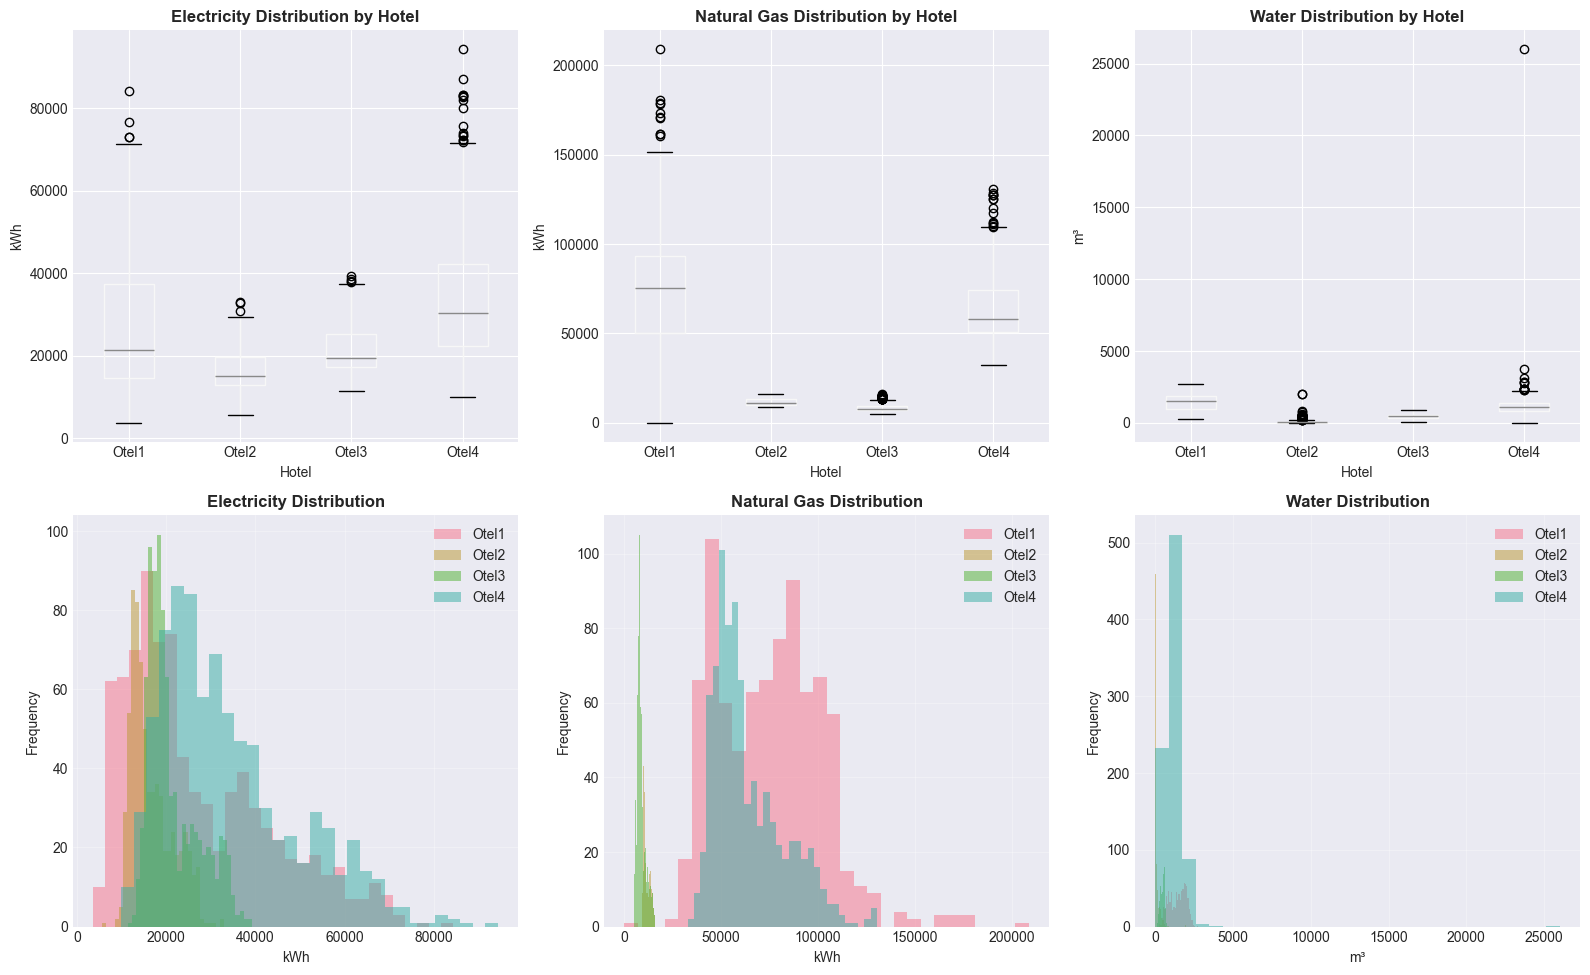

✅ Figure saved: ../results/figures_results/02_energy_distributions.png


In [7]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

clean_df.boxplot(column=elec_col, by='hotel_id', ax=axes[0, 0])
axes[0, 0].set_title('Electricity Distribution by Hotel', fontweight='bold')
axes[0, 0].set_ylabel('kWh')
axes[0, 0].set_xlabel('Hotel')
plt.sca(axes[0, 0])
plt.xticks(rotation=0)

clean_df.boxplot(column=gas_col, by='hotel_id', ax=axes[0, 1])
axes[0, 1].set_title('Natural Gas Distribution by Hotel', fontweight='bold')
axes[0, 1].set_ylabel('kWh')
axes[0, 1].set_xlabel('Hotel')
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

clean_df.boxplot(column=water_col, by='hotel_id', ax=axes[0, 2])
axes[0, 2].set_title('Water Distribution by Hotel', fontweight='bold')
axes[0, 2].set_ylabel('m³')
axes[0, 2].set_xlabel('Hotel')
plt.sca(axes[0, 2])
plt.xticks(rotation=0)

for hotel in clean_df['hotel_id'].unique():
    hotel_data = clean_df[clean_df['hotel_id'] == hotel]
    axes[1, 0].hist(hotel_data[elec_col].dropna(), bins=30, alpha=0.5, label=hotel)
axes[1, 0].set_title('Electricity Distribution', fontweight='bold')
axes[1, 0].set_xlabel('kWh')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

for hotel in clean_df['hotel_id'].unique():
    hotel_data = clean_df[clean_df['hotel_id'] == hotel]
    axes[1, 1].hist(hotel_data[gas_col].dropna(), bins=30, alpha=0.5, label=hotel)
axes[1, 1].set_title('Natural Gas Distribution', fontweight='bold')
axes[1, 1].set_xlabel('kWh')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

for hotel in clean_df['hotel_id'].unique():
    hotel_data = clean_df[clean_df['hotel_id'] == hotel]
    axes[1, 2].hist(hotel_data[water_col].dropna(), bins=30, alpha=0.5, label=hotel)
axes[1, 2].set_title('Water Distribution', fontweight='bold')
axes[1, 2].set_xlabel('m³')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.savefig('../results/figures_results/02_energy_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Figure saved: ../results/figures_results/02_energy_distributions.png")

📊 PER-PERSON CONSUMPTION STATISTICS

⚡ Electricity per person (kWh/guest/day):
           mean    std  median
hotel_id                      
Otel1     20.18  28.89   13.53
Otel2     13.48   7.61   11.82
Otel3     15.19   8.53   11.58
Otel4     28.15  20.79   22.07

🔥 Natural Gas per person (kWh/guest/day):
           mean     std  median
hotel_id                       
Otel1     86.56  152.51   38.95
Otel2     10.99    7.29    8.15
Otel3      7.00    5.56    4.55
Otel4     62.12   54.83   40.46

💧 Water per person (m³/guest/day):
          mean   std  median
hotel_id                    
Otel1     1.30  2.38    0.70
Otel2     0.06  0.12    0.02
Otel3     0.29  0.10    0.26
Otel4     0.96  1.50    0.80


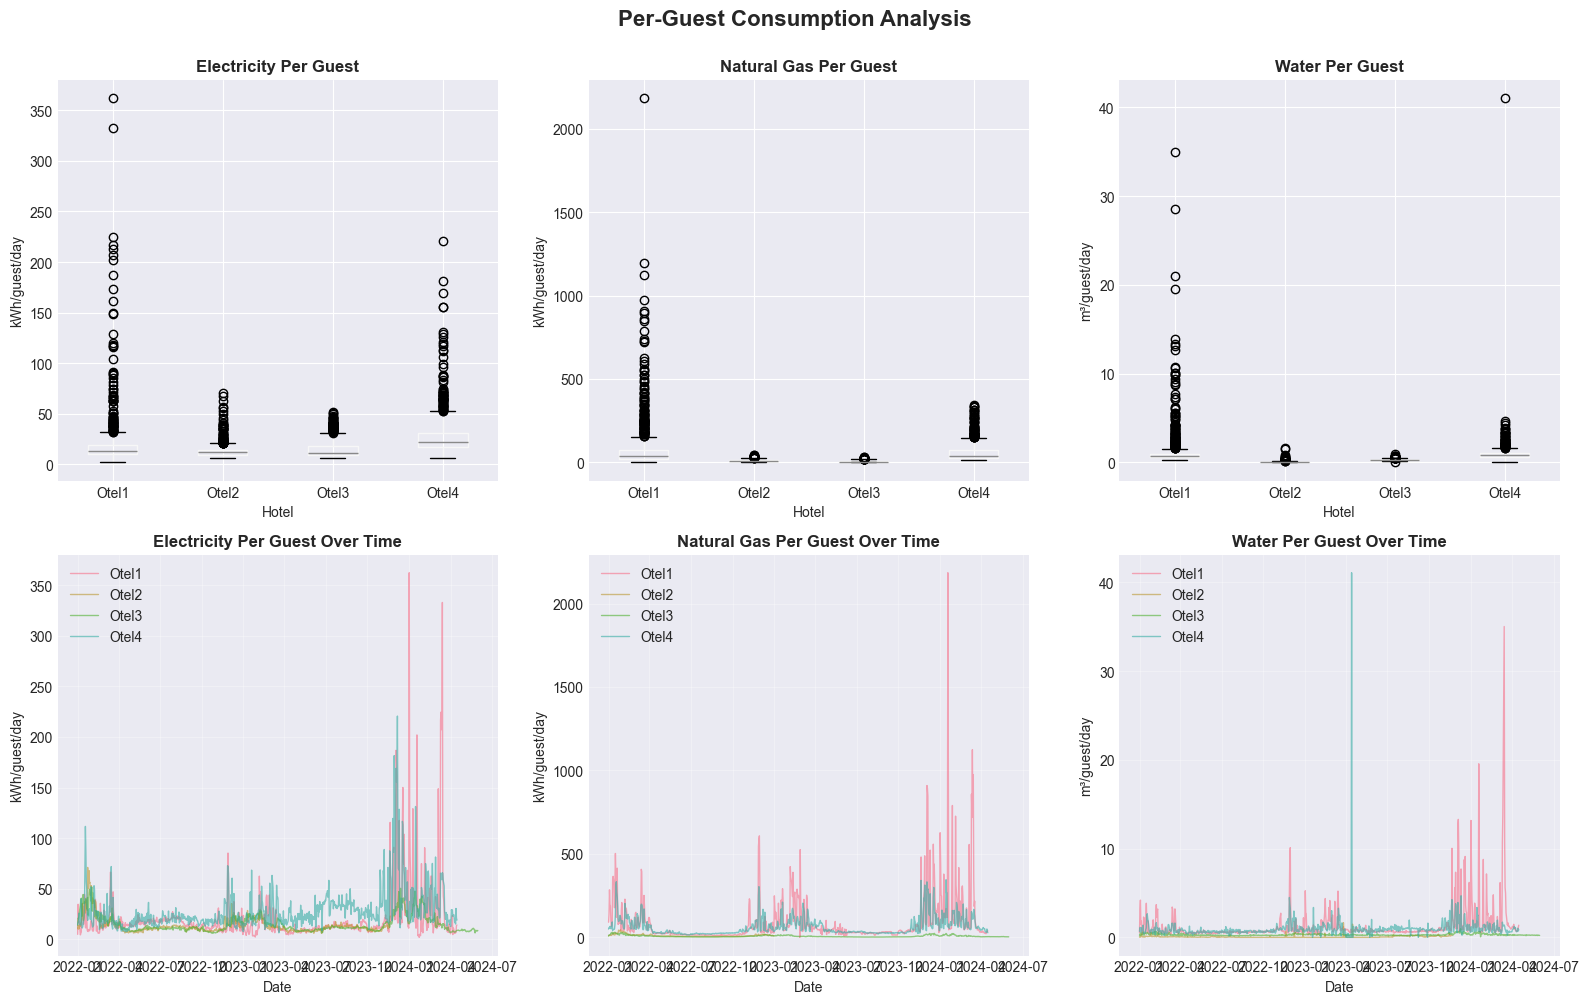


✅ Figure saved: ../results/figures_results/03_per_person_consumption.png


In [8]:
guest_col = 'total_guests' if 'total_guests' in clean_df.columns else 'Toplam Kişi'

clean_df_with_guests = clean_df[clean_df[guest_col] > 0].copy()

clean_df_with_guests['electricity_per_person'] = clean_df_with_guests[elec_col] / clean_df_with_guests[guest_col]
clean_df_with_guests['natural_gas_per_person'] = clean_df_with_guests[gas_col] / clean_df_with_guests[guest_col]
clean_df_with_guests['water_per_person'] = clean_df_with_guests[water_col] / clean_df_with_guests[guest_col]

print("="*60)
print("📊 PER-PERSON CONSUMPTION STATISTICS")
print("="*60)

per_person_summary = clean_df_with_guests.groupby('hotel_id').agg({
    'electricity_per_person': ['mean', 'std', 'median'],
    'natural_gas_per_person': ['mean', 'std', 'median'],
    'water_per_person': ['mean', 'std', 'median']
}).round(2)

print("\n⚡ Electricity per person (kWh/guest/day):")
print(per_person_summary['electricity_per_person'])

print("\n🔥 Natural Gas per person (kWh/guest/day):")
print(per_person_summary['natural_gas_per_person'])

print("\n💧 Water per person (m³/guest/day):")
print(per_person_summary['water_per_person'])

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

clean_df_with_guests.boxplot(column='electricity_per_person', by='hotel_id', ax=axes[0, 0])
axes[0, 0].set_title('Electricity Per Guest', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('kWh/guest/day', fontsize=10)
axes[0, 0].set_xlabel('Hotel')
plt.sca(axes[0, 0])
plt.xticks(rotation=0)

clean_df_with_guests.boxplot(column='natural_gas_per_person', by='hotel_id', ax=axes[0, 1])
axes[0, 1].set_title('Natural Gas Per Guest', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('kWh/guest/day', fontsize=10)
axes[0, 1].set_xlabel('Hotel')
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

clean_df_with_guests.boxplot(column='water_per_person', by='hotel_id', ax=axes[0, 2])
axes[0, 2].set_title('Water Per Guest', fontweight='bold', fontsize=12)
axes[0, 2].set_ylabel('m³/guest/day', fontsize=10)
axes[0, 2].set_xlabel('Hotel')
plt.sca(axes[0, 2])
plt.xticks(rotation=0)

for hotel in clean_df_with_guests['hotel_id'].unique():
    hotel_data = clean_df_with_guests[clean_df_with_guests['hotel_id'] == hotel].sort_values(date_col)
    axes[1, 0].plot(hotel_data[date_col], hotel_data['electricity_per_person'], 
                    label=hotel, alpha=0.6, linewidth=1)
axes[1, 0].set_title('Electricity Per Guest Over Time', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('kWh/guest/day', fontsize=10)
axes[1, 0].set_xlabel('Date', fontsize=10)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

for hotel in clean_df_with_guests['hotel_id'].unique():
    hotel_data = clean_df_with_guests[clean_df_with_guests['hotel_id'] == hotel].sort_values(date_col)
    axes[1, 1].plot(hotel_data[date_col], hotel_data['natural_gas_per_person'], 
                    label=hotel, alpha=0.6, linewidth=1)
axes[1, 1].set_title('Natural Gas Per Guest Over Time', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('kWh/guest/day', fontsize=10)
axes[1, 1].set_xlabel('Date', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

for hotel in clean_df_with_guests['hotel_id'].unique():
    hotel_data = clean_df_with_guests[clean_df_with_guests['hotel_id'] == hotel].sort_values(date_col)
    axes[1, 2].plot(hotel_data[date_col], hotel_data['water_per_person'], 
                    label=hotel, alpha=0.6, linewidth=1)
axes[1, 2].set_title('Water Per Guest Over Time', fontweight='bold', fontsize=12)
axes[1, 2].set_ylabel('m³/guest/day', fontsize=10)
axes[1, 2].set_xlabel('Date', fontsize=10)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('Per-Guest Consumption Analysis', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../results/figures_results/03_per_person_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Figure saved: ../results/figures_results/03_per_person_consumption.png")

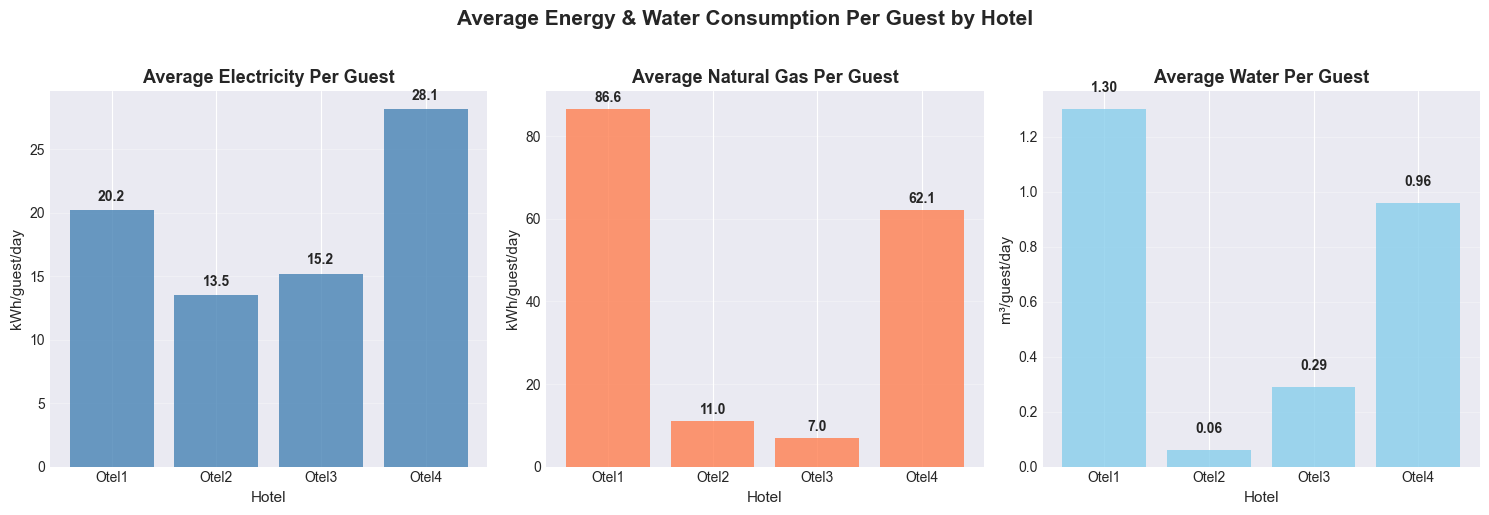

✅ Figure saved: ../results/figures_results/04_avg_per_person_comparison.png

📋 AVERAGE PER-GUEST CONSUMPTION SUMMARY TABLE
          electricity_per_person  natural_gas_per_person  water_per_person
hotel_id                                                                  
Otel1                      20.18                   86.56              1.30
Otel2                      13.48                   10.99              0.06
Otel3                      15.19                    7.00              0.29
Otel4                      28.15                   62.12              0.96


In [9]:
avg_per_person = clean_df_with_guests.groupby('hotel_id').agg({
    'electricity_per_person': 'mean',
    'natural_gas_per_person': 'mean',
    'water_per_person': 'mean'
}).round(2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

hotels = avg_per_person.index
x_pos = np.arange(len(hotels))
axes[0].bar(x_pos, avg_per_person['electricity_per_person'], color='steelblue', alpha=0.8)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(hotels)
axes[0].set_title('Average Electricity Per Guest', fontweight='bold', fontsize=13)
axes[0].set_ylabel('kWh/guest/day', fontsize=11)
axes[0].set_xlabel('Hotel', fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(avg_per_person['electricity_per_person']):
    axes[0].text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

axes[1].bar(x_pos, avg_per_person['natural_gas_per_person'], color='coral', alpha=0.8)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(hotels)
axes[1].set_title('Average Natural Gas Per Guest', fontweight='bold', fontsize=13)
axes[1].set_ylabel('kWh/guest/day', fontsize=11)
axes[1].set_xlabel('Hotel', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(avg_per_person['natural_gas_per_person']):
    axes[1].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

axes[2].bar(x_pos, avg_per_person['water_per_person'], color='skyblue', alpha=0.8)
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(hotels)
axes[2].set_title('Average Water Per Guest', fontweight='bold', fontsize=13)
axes[2].set_ylabel('m³/guest/day', fontsize=11)
axes[2].set_xlabel('Hotel', fontsize=11)
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(avg_per_person['water_per_person']):
    axes[2].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Average Energy & Water Consumption Per Guest by Hotel', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/figures_results/04_avg_per_person_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Figure saved: ../results/figures_results/04_avg_per_person_comparison.png")

print("\n" + "="*60)
print("📋 AVERAGE PER-GUEST CONSUMPTION SUMMARY TABLE")
print("="*60)
print(avg_per_person)